# **Perceptrón**

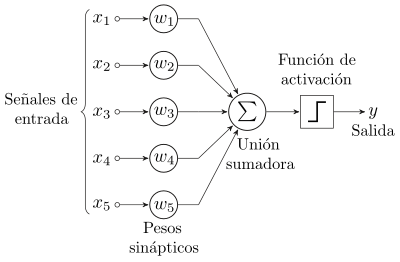
![Sin título-2.png](<attachment:Sin título-2.png>)
![Sin título.png](<attachment:Sin título.png>)
![Sin título-4.png](<attachment:Sin título-4.png>)
![Sin título-3.png](<attachment:Sin título-3.png>)



La fórmula es la siguiente:
**1/(1+e^x)**
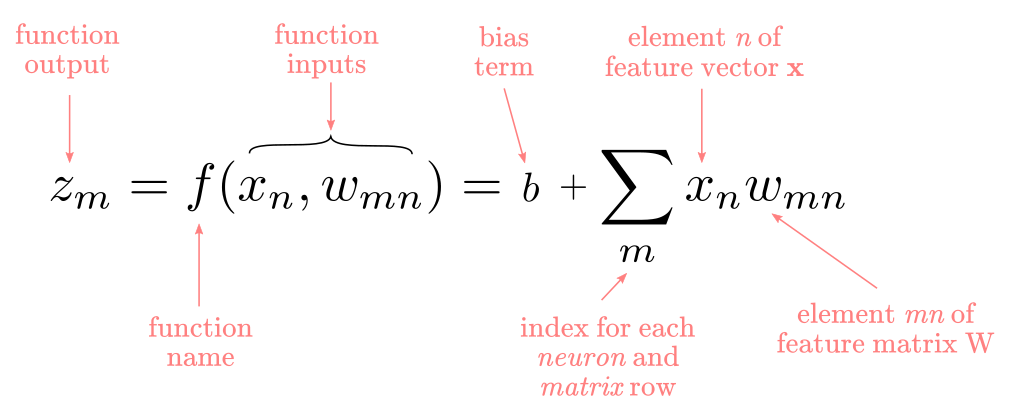
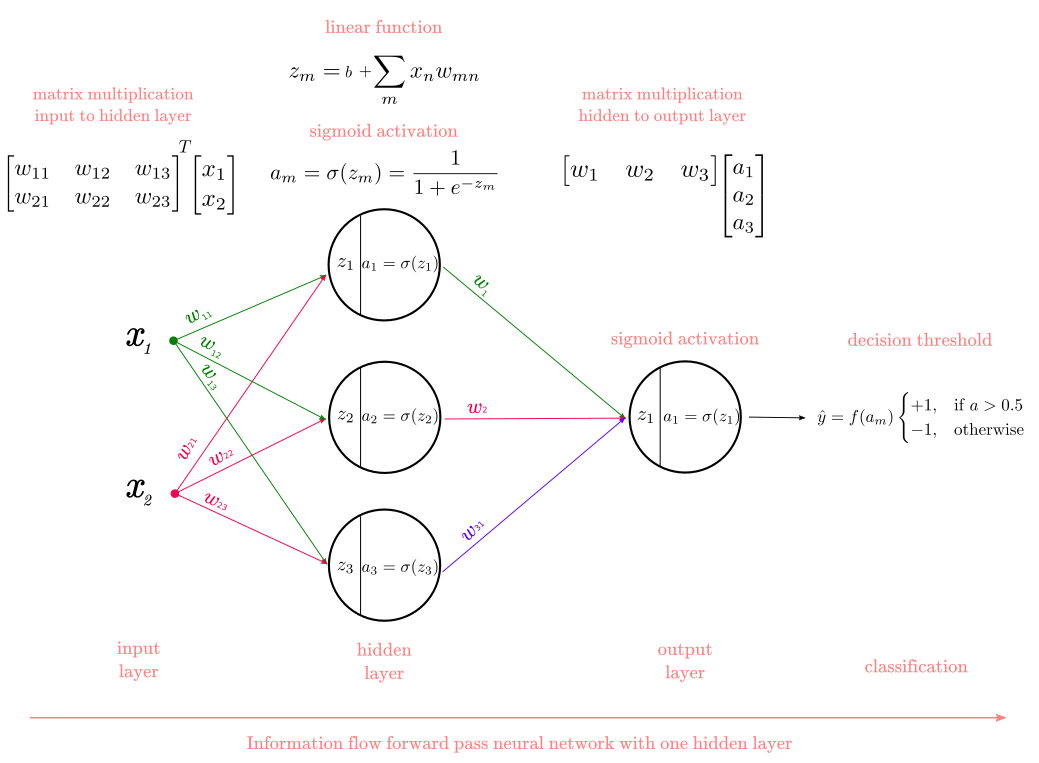
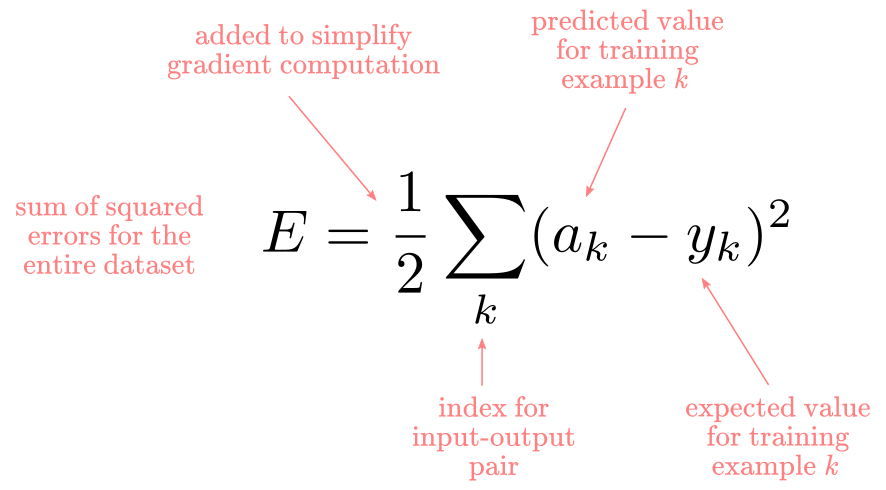
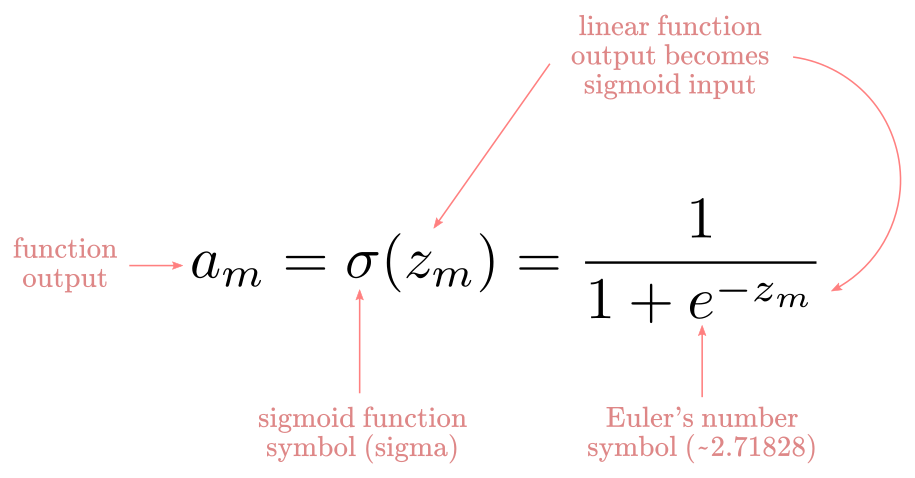

In [388]:
import numpy as np
from matplotlib import pyplot as plt

In [389]:
# TENDRÍAMOS LA FORMULA ANTERIOR
def sigmoide(z):
    return 1/(1+np.exp(-z))

# SU DERIVADA ES
def sigmoide_derizada_respecto_z(z):
    return sigmoide(z)*(1-sigmoide(z))

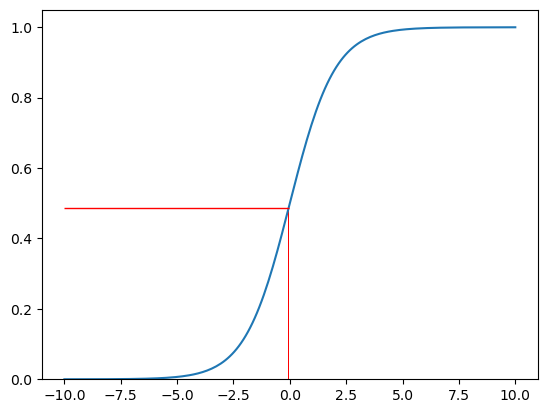

In [390]:
#ESTO ES LA REPREENTACIÓN DE LA SIGMOIDE

xs = np.linspace(10,-10,200)
ys = sigmoide(xs)
plt.plot(xs,ys)
plt.bar(xs[int(xs.__len__()/2)],ys[int(ys.__len__()/2)],0.05,color="r")
plt.hlines(ys[int(ys.__len__()/2)], xmin=xs.min(), xmax=xs[int(xs.__len__()/2)], linewidth=1,color="r")

In [391]:
# AÑADIMOS UN DATASET

# X1    X2  |  Y
# 0     0   |  0
# 0     1   |  1
# 1     0   |  1
# 1     1   |  1

# ESTA SERÍA LA OPERACIÓN
# 0*2 + 0*3 + 4     =   4
# 0*2 + 1*3 + 4     =   7
# 1*2 + 0*3 + 4     =   6
# 1*2 + 1*3 + 4     =   9

# dataset or
dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
# dataset and
#dt = [[0, 0, 0],[0, 1, 0],[1, 0, 0],[1, 1, 1]]

dt = np.array(dt)

#PRIMERAS 2 COLUMNAS
x = dt[:,[0,1]]

#ÚLTIMA COLUMNA
y = dt[:,[2]]
print(x)
print(y)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [1]]


In [392]:
#w1=2; w2=3; b=4

In [393]:
#region SALIDAS
def salida_sumatorio_v1(x):
    #PRIMERA COLUMNA
    x1 = x[:,[0]]
    #SEGUNDA COLUMNA
    x2 = x[:,[1]]
    
    # EN ESTE CASO W SON NÚMEROS PERO PUEDEN SER MATRICES
    t1 = x1 * w1
    t2 = x2 * w2
    return t1 + t2 + b


def salida_sumatorio(x):
    # AÑADIMOS UNA COLUMNA DE 1s
    # VALIDO TMB : xNueva = np.append(x,np.ones((len(x),1)),1)
    xNueva = np.hstack((x,np.ones((len(x),1))))
    ret = np.dot(xNueva,w)
    #PRIMERA COLUMNA
    #SEGUNDA COLUMNA
    return ret

def salida_activación(x):
    # OBTENEMOS LA OPERACIÓN DEL SUMATORIO
    s = salida_sumatorio(x)
    
    #CON ESO VAMOS AL SIGNMOIDE
    s2 = sigmoide(s)
    return s2

#endregion

#region ERROR Y COSTE
# X E Y REALES
def error(x,y):
    """
    x: param: X REALES
    y: param: Y REALES
    """
    y_hat = salida_activación(x)
    return y_hat - y

def coste(x,y):
    """
    ES EL ERROR/MEDIA Y DIVIDIDO ENTRE 2
    x: param: X REALES
    y: param: Y REALES
    """
    err = error(x,y)
    c = (err**2/2).mean()
    return c
#endregion

#region DERIVADAS
"""
DERIVADAS
"""

def derivada_coste_respecto_y_hat(x,y):
    """
    LA DERIVADA DEL COSTE RESPECTO Y_HAT ES EL ERROR
    x: param: X REALES
    y: param: Y REALES
    """
    return error(x,y)

def derivada_y_hat_respecto_sumatorio_z(x):
    """
    LA DERIVADA DE Y_HAT RESPECTO AL SUMATORIO/Z
    x: param: X REALES
    """
    z = salida_sumatorio(x)
    return sigmoide_derizada_respecto_z(z)

def derivada_sumatorio_respecto_w1(x):
    """
    LA DERIVADA DE SUMATORIO/Z RESPECTO A W1
    
    SE DEBE HACER MEDIAS YA QUE PUEDE SER UN ARRAY NO SOLO UN VALOR
    
    x: param: X REALES
    """
    return x[:,[0]]

def derivada_sumatorio_respecto_w2(x):
  return x[:, [1]]

def derivada_sumatorio_respecto_bias():
  return 1

def derivada_sumatorio_respecto_w(x):
    # AÑADIMOS UNA COLUMNA DE 1s
    # VALIDO TMB : xNueva = np.append(x,np.ones((len(x),1)),1)
    return np.hstack((x,np.ones((len(x),1))))
#endregion

def predice(x):
  y_hat = salida_activación(x)
  return y_hat

In [394]:
# NOS DÁ LOS VALORES DEL PRINCIPIO

# X1    X2  |  Y
# 0     0   |  0
# 0     1   |  1
# 1     0   |  1
# 1     1   |  1

# ESTA SERÍA LA OPERACIÓN
# 0*2 + 0*3 + 4     =   4
# 0*2 + 1*3 + 4     =   7
# 1*2 + 0*3 + 4     =   6
# 1*2 + 1*3 + 4     =   9


salida_sumatorio(x)

array([[-1.98466738],
       [ 2.5248614 ],
       [ 2.5248614 ],
       [ 7.03439019]])

In [395]:
xpru = x
s = salida_activación(xpru)
print(s)

# AÚN NOS FALTA EL ERROR Y EL COSTE, VAMOS AÑADIRLO
s = error(xpru,y)
print(f"\nERROR: {s}")


# AÚN NOS FALTA EL ERROR Y EL COSTE, VAMOS AÑADIRLO
s = coste(xpru,y)
print(f"\nCOSTE: {s}")

[[0.12082217]
 [0.92586642]
 [0.92586642]
 [0.99911972]]

ERROR: [[ 0.12082217]
 [-0.07413358]
 [-0.07413358]
 [-0.00088028]]

COSTE: 0.0031987933150973216


In [396]:
# dCoste/dW1 = dCoste/dY * dY/dz * dz/dW1

# SUS DERIVADAS SE HARÁN EN LA REGION DE DERIVADAS


In [397]:
def fit(x,y,epochs=100,lr=0.01):
    """
    REGIÓN DE ENTRENAMIENTO CON LOS DATOS QUE TENEMOS
    x: param List<int>: NÚMEROS REALES DE X
    y: param List<int>: NÚMEROS REALES DE Y
    epochs: param int: NÚMERO DE REPETICIONES
    lr: param float: LEARNING RATE
    """
    global w
    ilos = []
    for _ in range(epochs):
        
        # GRADIENTES DE CADA PUNTO
        dc = derivada_coste_respecto_y_hat(x,y)
        dy = derivada_y_hat_respecto_sumatorio_z(x)
        
        # EN CASO DE NÚMERO
        # dw1 = derivada_sumatorio_respecto_w1(x)
        # dw2 = derivada_sumatorio_respecto_w2(x)
        # db = derivada_sumatorio_respecto_bias()
        dw = derivada_sumatorio_respecto_w(x)
        
        # AL NO HACER LA MEDIA POR EL CAMINO HAY QUE HACERLA
        # w1 = w1 - (lr*dc*dy*dw1).mean()
        # w2 = w2 - (lr*dc*dy*dw2).mean()
        # b =  b  - (lr*dc*dy*db).mean()
        
        d1 = dc * dy
        d2 = d1 * dw
        # Traspuesta de D2
        dt = d2.T
    # alternativamente: dmedia = d2.mean(axis=0); dmedia = np.reshape(dmedia, (4,1))
        # MEDIA DE LAS COLUMNAS QUEDARÍA - - - siendo estos ΔX1 ΔX2 Δl en vez de eso en 3 COLUMNAS quedando 1 CON LA MEDIA
        
        # TIENE QUE GUARDAR DIMENSIONES KEEPDIMS=TRUE
        dmedia = dt.mean(axis=1,keepdims=True)
        # W QUE ES LA MATRIZ ORIGINAL 
        w = w - lr*dmedia
        
        # GUARDAMOS LA PERDIDA
        ilos.append(coste(x,y))
        #print(f"LOSS: {coste(x,y)}")
        print(f"loss: {coste(x,y)} w:{w}")
    return ilos
        

loss: 0.11928114817488167 w:[[0.03125]
 [0.03125]
 [0.03125]]
loss: 0.11410959415531355 w:[[0.06123254]
 [0.06123254]
 [0.0604894 ]]
loss: 0.10945540911808174 w:[[0.08993502]
 [0.08993502]
 [0.08773016]]
loss: 0.10528065145774494 w:[[0.11737096]
 [0.11737096]
 [0.11301634]]
loss: 0.10154326401464053 w:[[0.1435739 ]
 [0.1435739 ]
 [0.13641594]]
loss: 0.09820008430788793 w:[[0.16859154]
 [0.16859154]
 [0.15801341]]
loss: 0.09520897436750703 w:[[0.19248091]
 [0.19248091]
 [0.17790337]]
loss: 0.0925301904002674 w:[[0.21530432]
 [0.21530432]
 [0.19618552]]
loss: 0.09012715614283962 w:[[0.23712633]
 [0.23712633]
 [0.21296087]]
loss: 0.0879668028308522 w:[[0.25801149]
 [0.25801149]
 [0.22832893]]
loss: 0.08601961539941225 w:[[0.2780228 ]
 [0.2780228 ]
 [0.24238585]]
loss: 0.08425949389823419 w:[[0.29722064]
 [0.29722064]
 [0.25522318]]
loss: 0.08266350957531052 w:[[0.31566218]
 [0.31566218]
 [0.26692722]]
loss: 0.0812116103572495 w:[[0.33340101]
 [0.33340101]
 [0.27757864]]
loss: 0.0798863114

loss: 0.05065440096158831 w:[[1.04296562]
 [1.04296562]
 [0.13468965]]
loss: 0.05044344751259279 w:[[1.0493456]
 [1.0493456]
 [0.1297683]]
loss: 0.05023370050135417 w:[[1.05570122]
 [1.05570122]
 [0.12484531]]
loss: 0.050025149791489525 w:[[1.06203294]
 [1.06203294]
 [0.11992159]]
loss: 0.04981778572266326 w:[[1.06834118]
 [1.06834118]
 [0.11499798]]
loss: 0.04961159906918292 w:[[1.07462637]
 [1.07462637]
 [0.11007531]]
loss: 0.049406581001871445 w:[[1.08088892]
 [1.08088892]
 [0.10515438]]
loss: 0.049202723052965025 w:[[1.0871292 ]
 [1.0871292 ]
 [0.10023592]]
loss: 0.04900001708380656 w:[[1.0933476 ]
 [1.0933476 ]
 [0.09532068]]
loss: 0.048798455255121644 w:[[1.09954446]
 [1.09954446]
 [0.09040935]]
loss: 0.04859802999968238 w:[[1.10572014]
 [1.10572014]
 [0.0855026 ]]
loss: 0.048398733997178194 w:[[1.11187496]
 [1.11187496]
 [0.08060107]]
loss: 0.04820056015112736 w:[[1.11800925]
 [1.11800925]
 [0.07570537]]
loss: 0.04800350156767586 w:[[1.1241233 ]
 [1.1241233 ]
 [0.07081609]]
loss

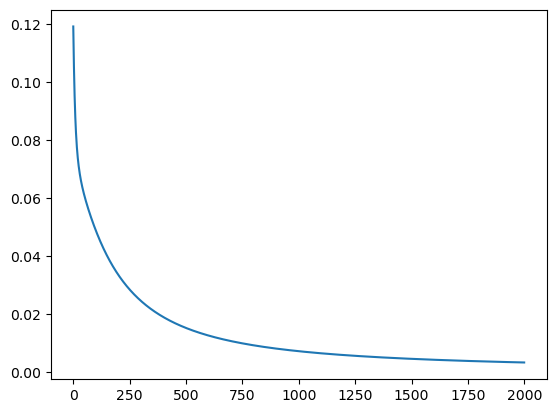

In [398]:

w = np.array([[0], [0], [0]])

nepochs = 2000
lloss = fit(x, y, epochs = nepochs, lr=0.5)
ret = predice(x)
print(ret)
plt.plot([i for i in range(len(lloss))], lloss)